In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('SM1_data.csv')
data=data.set_index('Date')
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
train = data.loc[data.index <'2017-01-01']
test = data.loc[(data.index >= '2017-01-01') & (data.index < '2021-01-01')]



----At 10cm ddepth----


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 192.6867 - mae: 9.6095 - val_loss: 20.0533 - val_mae: 3.2906
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 20.4714 - mae: 3.2079 - val_loss: 15.8756 - val_mae: 2.7931
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 16.9458 - mae: 2.8813 - val_loss: 15.8126 - val_mae: 2.7877
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 15.5890 - mae: 2.7277 - val_loss: 15.7136 - val_mae: 2.7718
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.9278 - mae: 2.6754 - val_loss: 15.9656 - val_mae: 2.9133
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.4337 - mae: 2.6364 - val_loss: 15.8651 - val_mae: 2.8708
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.4054 - mae: 2.5813 - val_loss: 17.0659 - val_mae: 3.0965
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.2498 - mae: 2.6166 - val_loss: 14.5765 - val_mae: 2.8140
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━

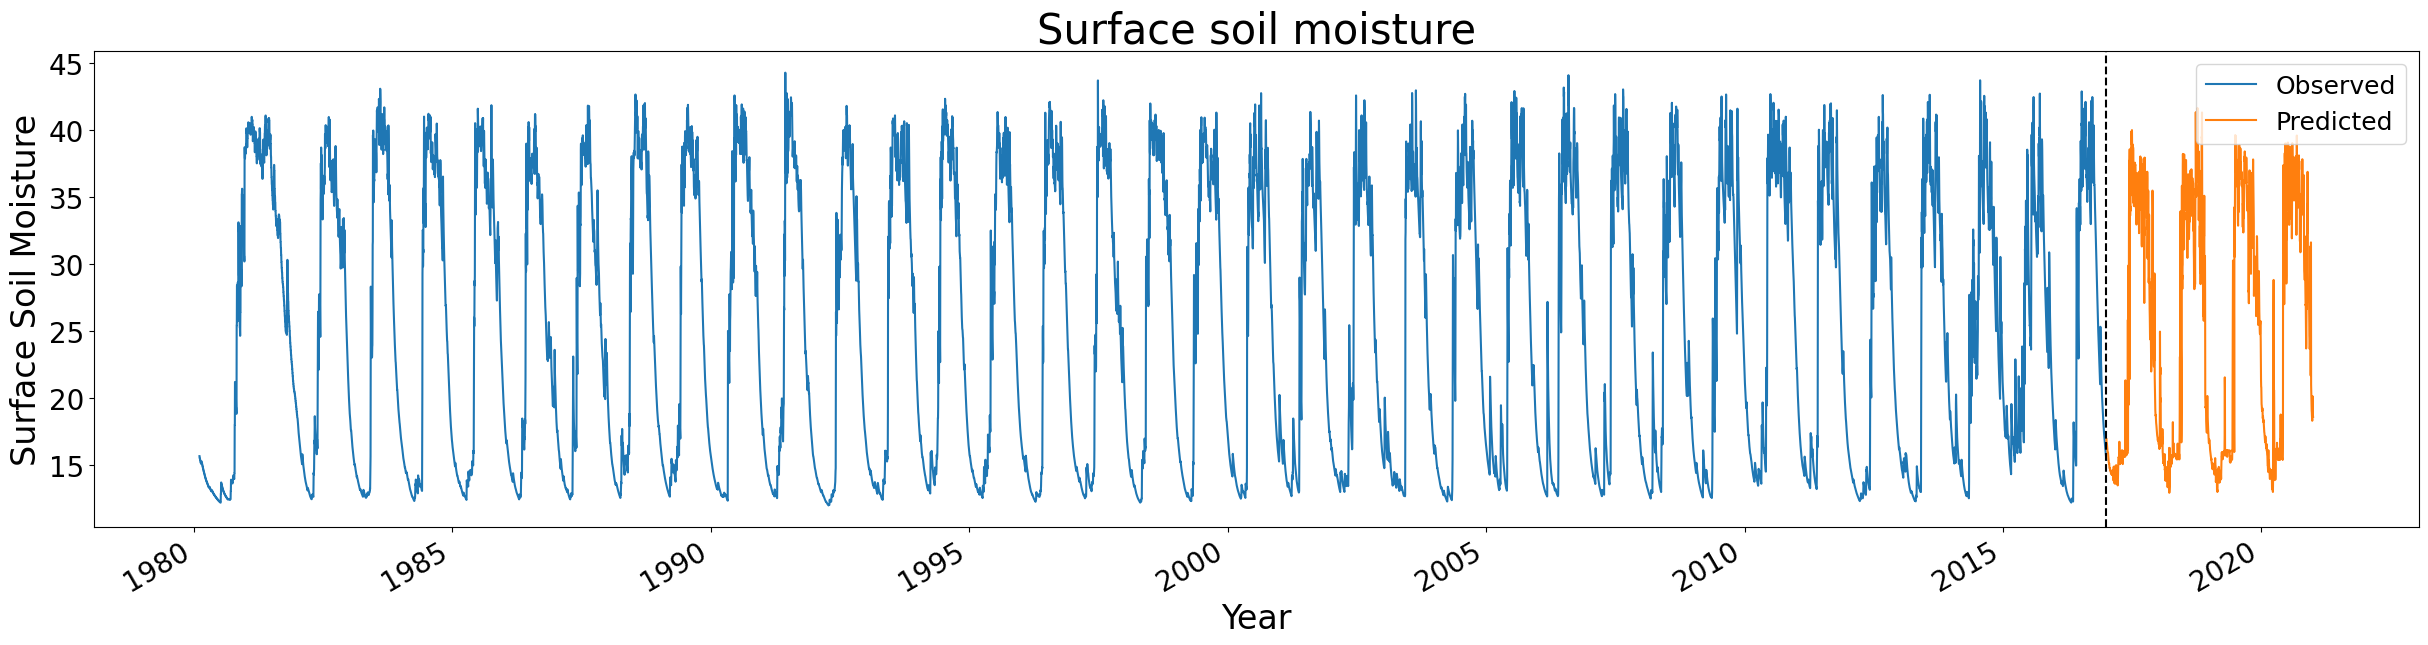

In [7]:
print("----At 10cm ddepth----")

X_train=train[[ 'Rain','St10', 'Air_Temperature','ref40']]
Y_train = train['SM10']
X_test=test[[ 'Rain','St10', 'Air_Temperature','ref40']]
Y_test = test['SM10']


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)

rmse = np.sqrt(mean_squared_error(Y_test, SMP))

fig,ax = plt.subplots(figsize=(30,7))
train['SM10'].plot(ax=ax,label='Observed surface soil moisture')
SMP_series.plot(ax=ax,label='predicted surface soil moisture')
ax.axvline('2017-01-01',color='black',ls='--')
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=40)
plt.title('Surface soil moisture')
plt.ylabel('Surface Soil Moisture')
plt.xlabel('Year')
plt.show()


----At 30cm ddepth----


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 164.3283 - mae: 8.0624 - val_loss: 3.2375 - val_mae: 1.2210
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7267 - mae: 0.9222 - val_loss: 2.8336 - val_mae: 1.0780
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6836 - mae: 0.9070 - val_loss: 3.0714 - val_mae: 1.2049
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6696 - mae: 0.9088 - val_loss: 2.6553 - val_mae: 1.1328
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6426 - mae: 0.8941 - val_loss: 2.5925 - val_mae: 1.1550
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5956 - mae: 0.9009 - val_loss: 2.5143 - val_mae: 1.1219
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6733 - mae: 0.9288 - val_loss: 2.6575 - val_mae: 1.1677
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6158 - mae: 0.9200 - val_loss: 2.8106 - val_mae: 1.1679
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

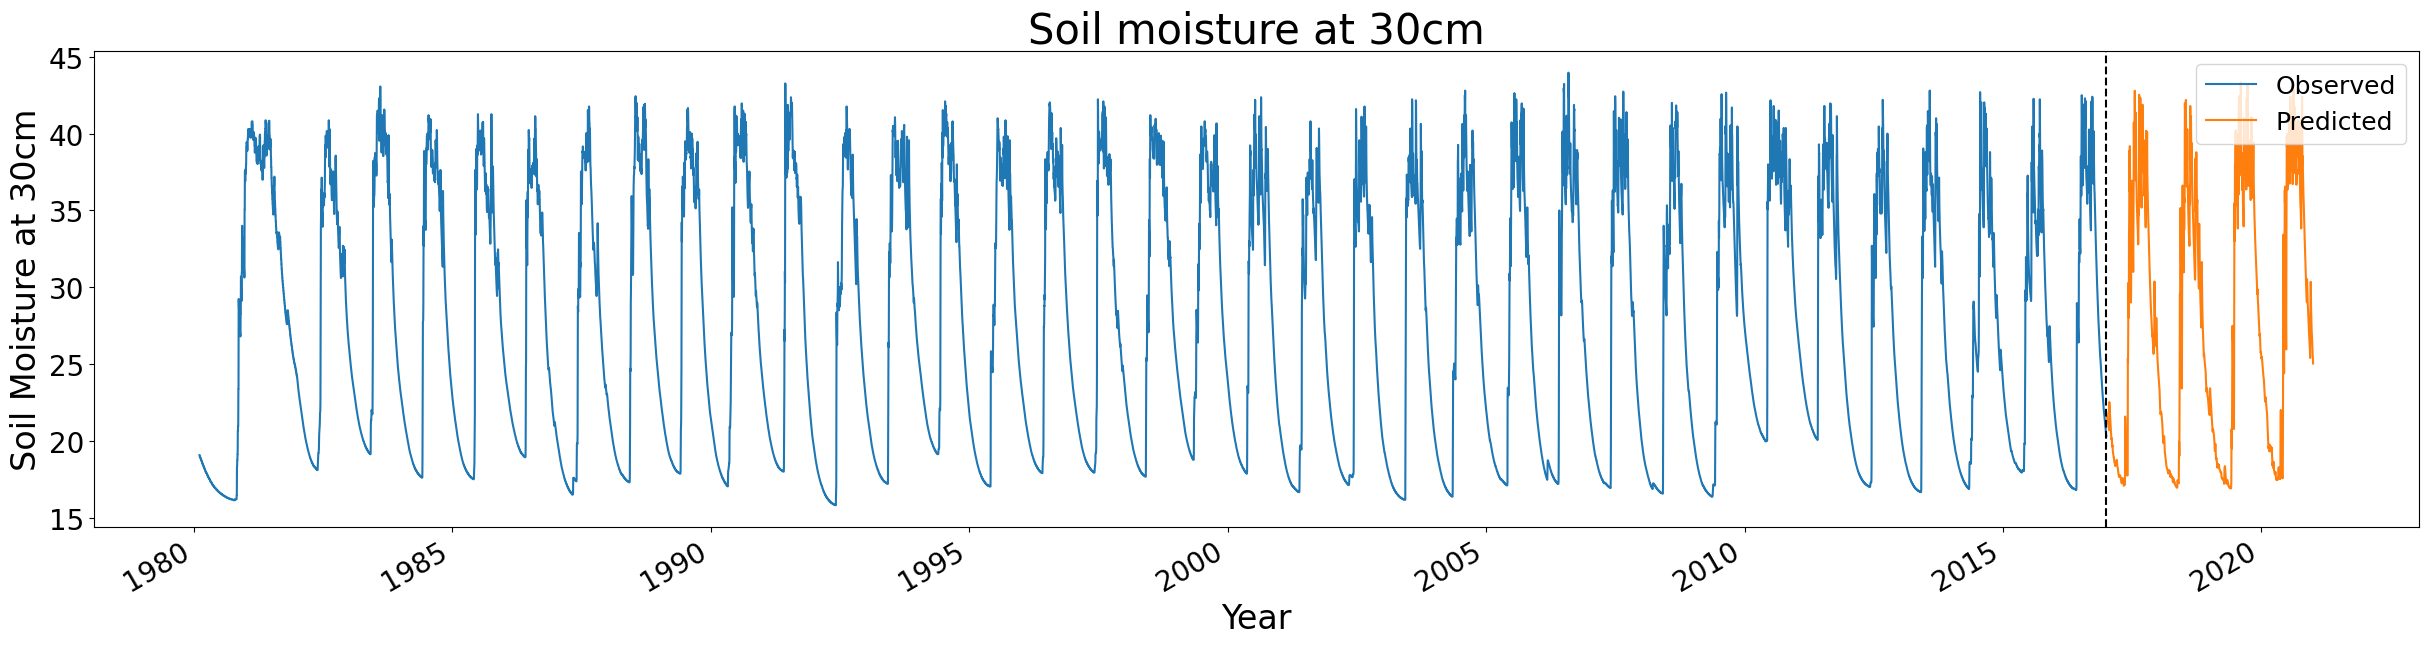

In [4]:
print("----At 30cm ddepth----")

X_train=train[[ 'SM10','St30']]
Y_train = train['SM30']
X_test=test[[  'SM10','St30']]
Y_test = test['SM30']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)

rmse = np.sqrt(mean_squared_error(Y_test, SMP))

fig,ax = plt.subplots(figsize=(30,7))
train['SM30'].plot(ax=ax,label='Observed soil moisture at 30cm')
SMP_series.plot(ax=ax,label='predicted soil moisture at 30cm')
ax.axvline('2017-01-01',color='black',ls='--')
ax.legend(['Training set','Test set'])
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=40)
plt.ylabel('Soil Moisture at 30cm')
plt.xlabel('Year')
plt.title('Soil moisture at 30cm')
plt.show()

----At 60cm ddepth----


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 161.8940 - mae: 8.2052 - val_loss: 3.0888 - val_mae: 1.1762
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5071 - mae: 0.7687 - val_loss: 1.7391 - val_mae: 0.8098
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0323 - mae: 0.5965 - val_loss: 1.4967 - val_mae: 0.7962
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0402 - mae: 0.6032 - val_loss: 1.6576 - val_mae: 0.9253
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0591 - mae: 0.6403 - val_loss: 1.3259 - val_mae: 0.7332
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9779 - mae: 0.5988 - val_loss: 1.8196 - val_mae: 0.8873
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9974 - mae: 0.6041 - val_loss: 2.0883 - val_mae: 0.9762
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0097 - mae: 0.6261 - val_loss: 1.3922 - val_mae: 0.6700
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step -

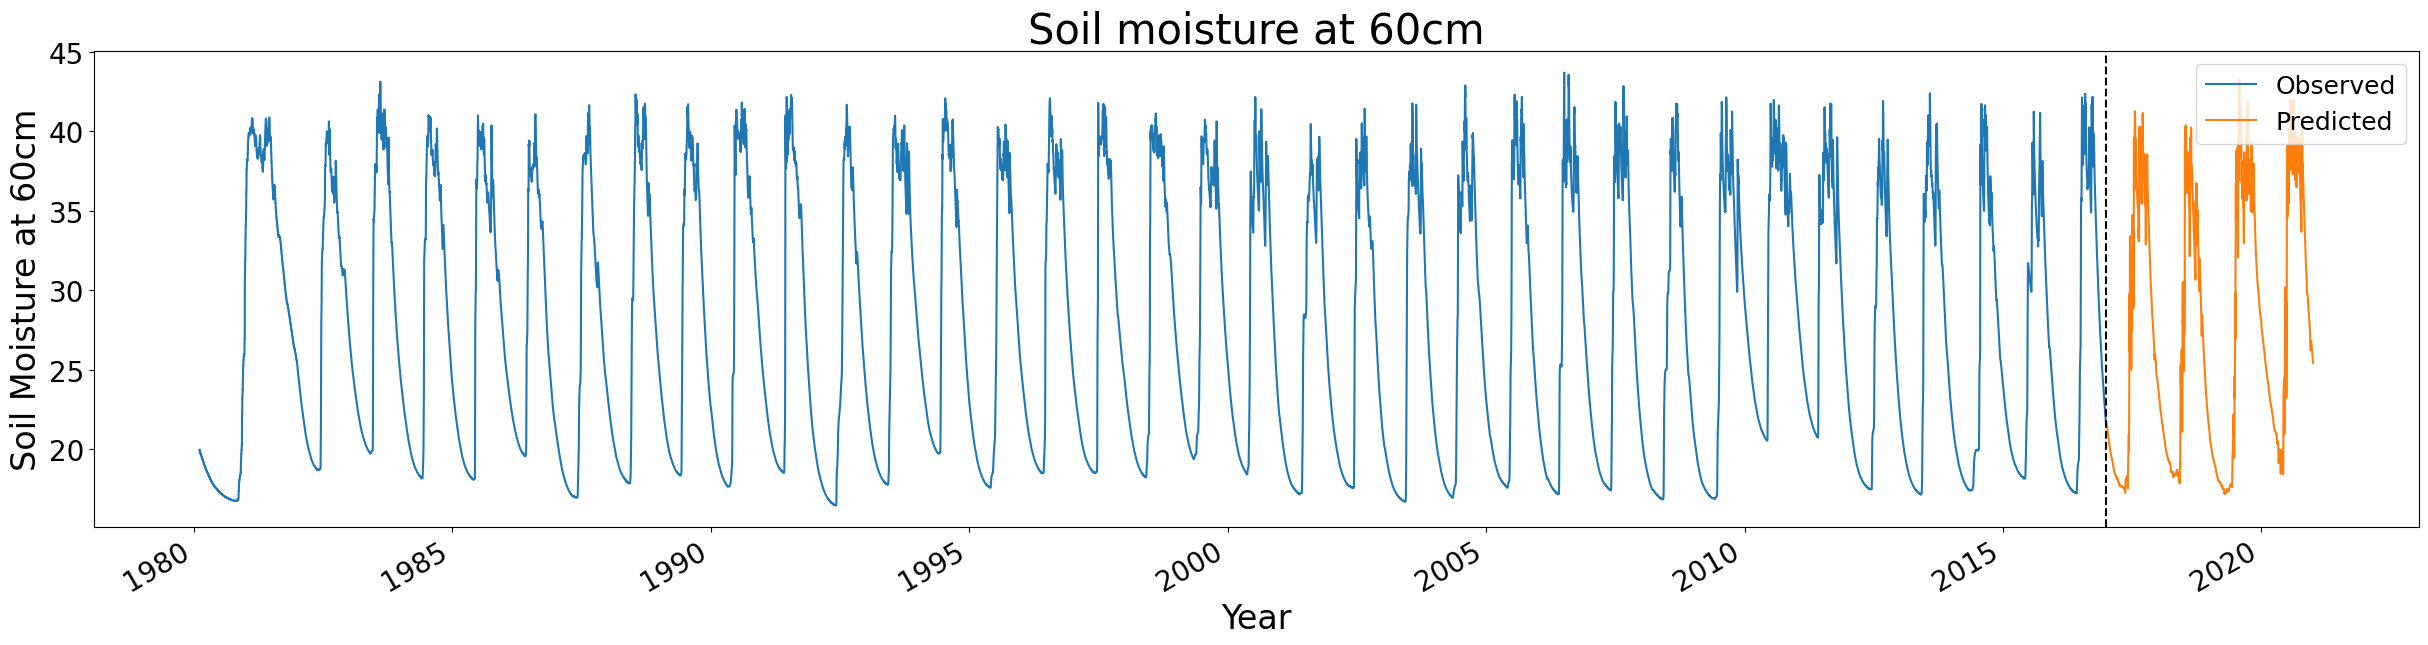

In [5]:

print("----At 60cm ddepth----")

X_train=train[[ 'SM10','St60','SM30']]
Y_train = train['SM60']
X_test=test[[ 'SM10','St60','SM30']]
Y_test = test['SM60']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)
rmse = np.sqrt(mean_squared_error(Y_test, SMP))

fig,ax = plt.subplots(figsize=(30,7))
train['SM60'].plot(ax=ax,label='Observed soil moisture at 60cm')
SMP_series.plot(ax=ax,label='predicted soil moisture at 60cm')
ax.axvline('2017-01-01',color='black',ls='--')
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=40)
plt.ylabel('Soil Moisture at 60cm')
plt.xlabel('Year')
plt.title('Soil moisture at 60cm')
plt.show()

----At 100cm ddepth----


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 220.1219 - mae: 9.6551 - val_loss: 1.5700 - val_mae: 0.8745
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6798 - mae: 0.5659 - val_loss: 0.6109 - val_mae: 0.5263
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3681 - mae: 0.4052 - val_loss: 0.4672 - val_mae: 0.4771
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2876 - mae: 0.3538 - val_loss: 0.4691 - val_mae: 0.4987
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2686 - mae: 0.3399 - val_loss: 0.5469 - val_mae: 0.5433
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2674 - mae: 0.3471 - val_loss: 0.3974 - val_mae: 0.4114
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2117 - mae: 0.2943 - val_loss: 0.5881 - val_mae: 0.5699
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3242 - mae: 0.4078 - val_loss: 0.3954 - val_mae: 0.4198
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - 

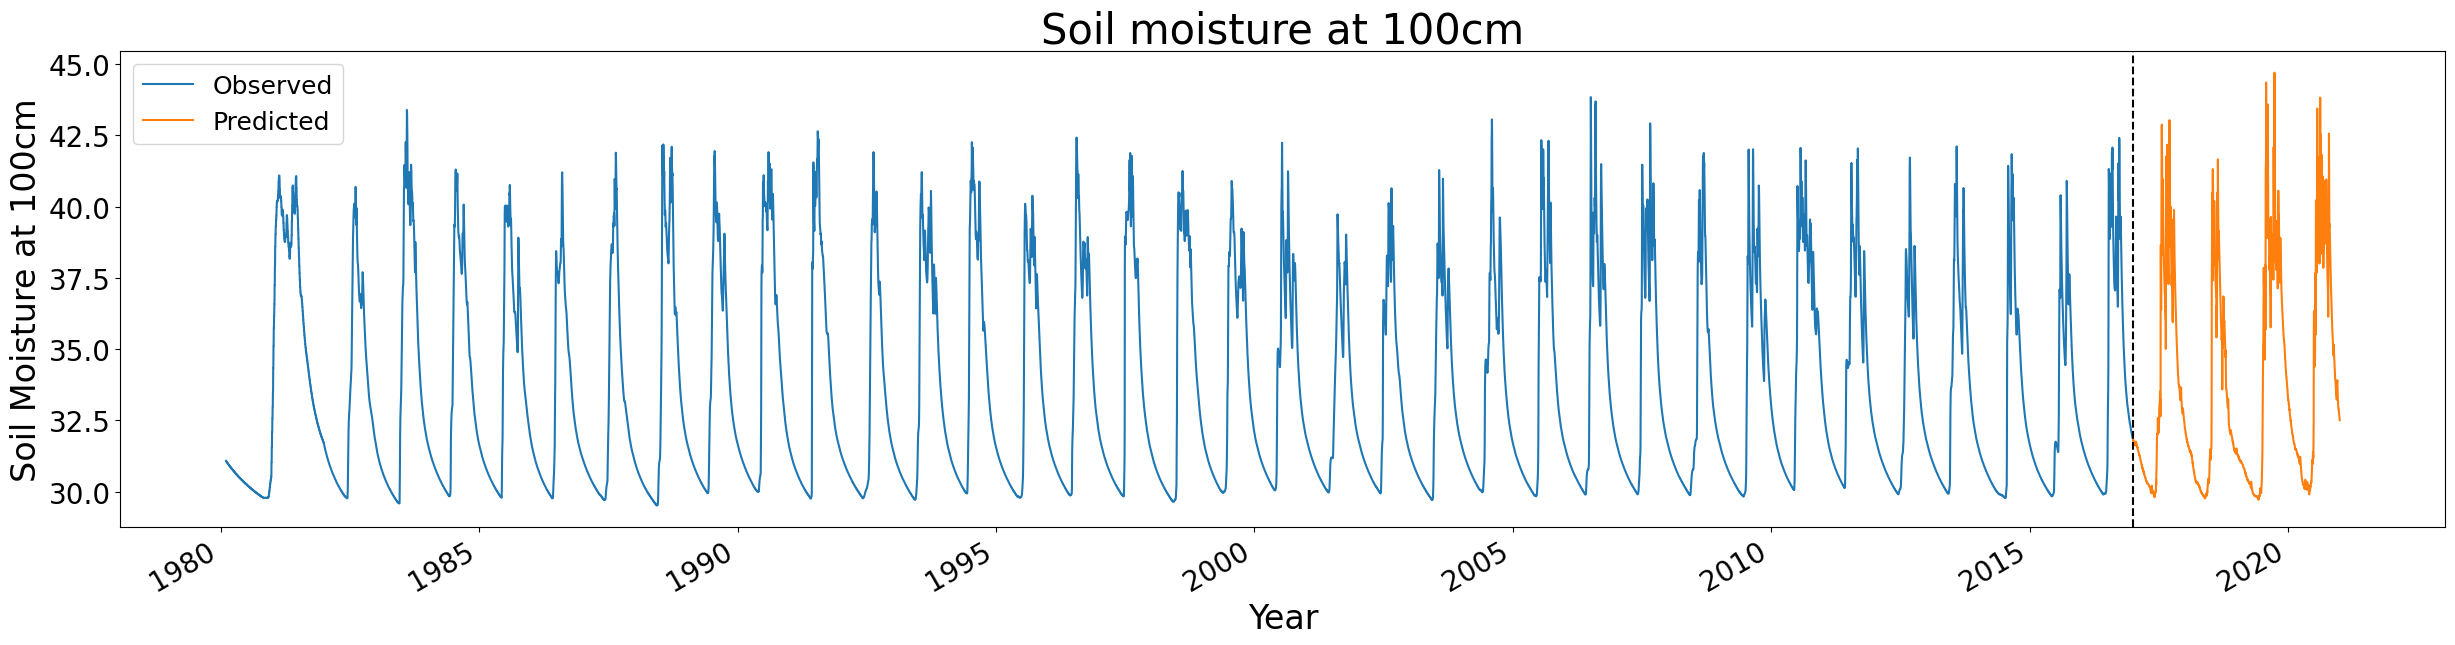

In [6]:
print("----At 100cm ddepth----")

X_train=train[[ 'SM10','SM60','SM30','St100']]
Y_train = train['SM100']
X_test=test[[ 'SM10','SM60','SM30','St100']]
Y_test = test['SM100']


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)
rmse = np.sqrt(mean_squared_error(Y_test, SMP))

fig,ax = plt.subplots(figsize=(30,7))
train['SM100'].plot(ax=ax,label='Observed soil moisture at 100cm')
SMP_series.plot(ax=ax,label='predicted soil moisture at 100cm')
ax.axvline('2017-01-01',color='black',ls='--')
ax.legend(['Observed','Predicted'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=40)
plt.ylabel('Soil Moisture at 100cm')
plt.xlabel('Year')
plt.title('Soil moisture at 100cm')
plt.show()
